# BA843 Team2 - Buiness Analysis with Yelp
--Yuanshan Zhang, Ananya Anand, Shubham Mishra, Shizuka Takahshi, Ruiqi Jiang

# 1. Executive Summary

- Star ratings is positively skewed and centralized between 3.5 and 4.5
- Number of reviews droped significantly after COVID-19
- Food & restuarants are most common types of businesses in the dataset
- Businesses with renounced brands, such as Starbucks and McDonald's, are more likely to receive reviews, especially useful reviews
- Most reviews are food-related and positive words are very frequent

# 2. Business Problem & Definition

 In today's competitive business landscape, customer feedback plays a crucial role in shaping the success of businesses. However, managing tremendous volumes of data poses challenges in extracting actionable insights to enhance services. By leveraging big data techniques, our objective is to provide valuable insights for businesses in several ways. Firstly, we aim to identify businesses that are either liked or disliked by customers by analyzing features such as 'stars' and 'review_count'. Secondly, we aim to discern common compliments and complaints from users by conducting sentiment analysis on reviews. Lastly, we will offer suggestions on how businesses can attract more customers and increase brand exposure.

# 3. Data Description + Data Source
The Yelp dataset consists of 5 JSON files: buiness, checkin, review, tip, and user, covering 150,346 businesses and 6,990,280 reviews. Of particular interest is the business table, which contains over 1.2 million business attributes including hours, parking availability, and ambience. Upon merging with the review table, the resulting table will comprise roughly 6 million rows and require about 8 GB of storage space.

Source: https://www.yelp.com/dataset/documentation/main

Below are the schema for our data:

business.json\
Contains business data including name, address, categories, and so forth.

| Column Name     | Description                                                  | Type                    |
|-----------------|--------------------------------------------------------------|-------------------------|
| business_id     | Unique identifier for the business.                          | string (22 characters)  |
| name            | Name of the business.                                        | string                  |
| address         | Full address of the business.                                | string                  |
| city            | City where the business is located.                          | string                  |
| state           | 2 character state code, if applicable.                       | string                  |
| postal code     | Postal code for the business location.                       | string                  |
| latitude        | Latitude of the business location.                           | float                   |
| longitude       | Longitude of the business location.                          | float                   |
| stars           | Star rating of the business, rounded to half-stars.          | float                   |
| review_count    | Number of reviews for the business.                          | integer                 |
| is_open         | Indicates if the business is open or closed.                 | integer (0 or 1)        |
| attributes      | Business attributes and their values.                        | object                  |
| categories      | Categories the business falls under.                         | array of strings        |
| hours           | Operating hours for each day of the week.                    | object                  |


checkin.json\
Checkins on a business.

| Column Name   | Description                                                                 | Type    |
|---------------|-----------------------------------------------------------------------------|---------|
| business_id   | Unique business identifier, maps to business.json.                          | string  |
| date          | Comma-separated list of timestamps for each check-in (YYYY-MM-DD HH:MM:SS). | string  |


review.json\
Contains full review text data, including the user (user_id) who wrote the review and the business (business_id) for which the review was written.

| Column Name  | Description                                      | Type       |
|--------------|--------------------------------------------------|------------|
| review_id    | Unique review identifier.                        | string     |
| user_id      | Unique user identifier.                          | string     |
| business_id  | Unique business identifier.                      | string     |
| stars        | Star rating given in the review.                 | integer    |
| date         | Date when the review was posted (YYYY-MM-DD).    | string     |
| text         | Content of the review.                           | string     |
| useful       | Number of 'useful' votes received for the review. | integer    |
| funny        | Number of 'funny' votes received for the review. | integer    |
| cool         | Number of 'cool' votes received for the review.  | integer    |


tip.json\
Tips written by a user on a business. Tips are shorter than reviews and tend to convey quick suggestions.

| Column Name       | Description                                           | Type    |
|-------------------|-------------------------------------------------------|---------|
| text              | Text of the tip.                                      | string  |
| date              | Date when the tip was written (YYYY-MM-DD).           | string  |
| compliment_count  | How many compliments the tip has received.            | integer |
| business_id       | Unique business identifier, maps to business.json.    | string  |
| user_id           | Unique user identifier, maps to the user in user.json.| string  |


user.jason\
User data including the user's friend mapping and all metadata associated with the user.

| Column Name           | Description                                                                 | Type             |
|-----------------------|-----------------------------------------------------------------------------|------------------|
| user_id               | Unique user identifier, maps to the user in user.json.                      | string           |
| name                  | The user's first name.                                                      | string           |
| review_count          | The number of reviews they've written.                                      | integer          |
| yelping_since         | When the user joined Yelp (YYYY-MM-DD).                                     | string           |
| friends               | An array of the user's friends as user_ids.                                 | array of strings |
| useful                | Number of useful votes sent by the user.                                    | integer          |
| funny                 | Number of funny votes sent by the user.                                     | integer          |
| cool                  | Number of cool votes sent by the user.                                      | integer          |
| fans                  | Number of fans the user has.                                                | integer          |
| elite                 | The years the user was elite.                                               | array of integers|
| average_stars         | Average rating of all reviews.                                              | float            |
| compliment_hot        | Number of hot compliments received by the user.                             | integer          |
| compliment_more       | Number of more compliments received by the user.                            | integer          |
| compliment_profile    | Number of profile compliments received by the user.                         | integer          |
| compliment_cute       | Number of cute compliments received by the user.                            | integer          |
| compliment_list       | Number of list compliments received by the user.                            | integer          |
| compliment_note       | Number of note compliments received by the user.                            | integer          |
| compliment_plain      | Number of plain compliments received by the user.                           | integer          |
| compliment_cool       | Number of cool compliments received by the user.                            | integer          |
| compliment_funny      | Number of funny compliments received by the user.                           | integer          |
| compliment_writer     | Number of writer compliments received by the user.                          | integer          |
| compliment_photos     | Number of photo compliments received by the user.                           | integer          |

# 4. Load Dataset

In [1]:
path = "gs://ba843-15/notebooks/jupyter/data/"

# read datasets
df_review = spark.read.json(path+'Yelp/yelp_academic_dataset_business.json')
df_checkin = spark.read.json(path+'Yelp/yelp_academic_dataset_checkin.json')
df_business = spark.read.json(path+'Yelp/yelp_academic_dataset_business.json')
df_tip = spark.read.json(path+'Yelp/yelp_academic_dataset_tip.json')
df_user = spark.read.json(path+'Yelp/yelp_academic_dataset_user.json')

24/04/29 03:08:06 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


In [2]:
from pyspark.sql import functions as F

In [3]:
# Rename columns
df_business = df_business.withColumnRenamed('stars', 'business_stars')
df_review = df_review.withColumnRenamed('stars', 'review_stars')

df_review = df_review.withColumnRenamed('text', 'review_text')
df_tip = df_tip.withColumnRenamed('text', 'tip_text')

df_review = df_review.withColumnRenamed('date', 'review_date')
df_checkin = df_checkin.withColumnRenamed('date', 'checkin_date')
df_tip = df_tip.withColumnRenamed('date', 'tip_date')

df_business = df_business.withColumnRenamed('review_count', 'business_review_count')
df_user = df_user.withColumnRenamed('review_count', 'user_review_count')

df_business = df_business.withColumnRenamed('name', 'business_name')
df_user = df_user.withColumnRenamed('name', 'user_name')

df_review = df_review.withColumnRenamed('useful', 'review_useful')
df_review = df_review.withColumnRenamed('funny', 'review_funny')
df_review = df_review.withColumnRenamed('cool', 'review_cool')
df_user = df_user.withColumnRenamed('useful', 'user_useful')
df_user = df_user.withColumnRenamed('funny', 'user_funny')
df_user = df_user.withColumnRenamed('cool', 'user_cool')

# 5. Data Cleaning

## 1. Clean df_review

In [ ]:
df_review.printSchema()

root
 |-- business_id: string (nullable = true)
 |-- review_cool: long (nullable = true)
 |-- review_date: string (nullable = true)
 |-- review_funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- review_stars: double (nullable = true)
 |-- review_text: string (nullable = true)
 |-- review_useful: long (nullable = true)
 |-- user_id: string (nullable = true)



In [ ]:
# Check null values
for col_name in df_review.columns:
    null_count = df_review.filter(F.col(col_name).isNull()).count()
    if null_count > 0:
        print(f"Column '{col_name}' has {null_count} null values.")
    else:
        print(f"Column '{col_name}' has no null values.")

Column 'business_id' has no null values.


Column 'review_cool' has no null values.


Column 'review_date' has no null values.


Column 'review_funny' has no null values.


Column 'review_id' has no null values.


Column 'review_stars' has no null values.


Column 'review_text' has no null values.


Column 'review_useful' has no null values.


Column 'user_id' has no null values.


In [ ]:
# Check duplicate values
duplicate_rows_review = df_review.exceptAll(df_review.dropDuplicates())
duplicate_rows_review.show()

+-----------+-----------+-----------+------------+---------+------------+-----------+-------------+-------+
|business_id|review_cool|review_date|review_funny|review_id|review_stars|review_text|review_useful|user_id|
+-----------+-----------+-----------+------------+---------+------------+-----------+-------------+-------+
+-----------+-----------+-----------+------------+---------+------------+-----------+-------------+-------+



In [4]:
# Convert date to timestamp
df_review = df_review.withColumn('review_date', F.to_timestamp('review_date', 'yyyy-MM-dd HH:mm:ss'))

## 2. Clean df_checkin

In [ ]:
df_checkin.printSchema()

root
 |-- business_id: string (nullable = true)
 |-- checkin_date: string (nullable = true)



In [ ]:
# Check null values
for col_name in df_checkin.columns:
    null_count = df_checkin.filter(F.col(col_name).isNull()).count()
    if null_count > 0:
        print(f"Column '{col_name}' has {null_count} null values.")
    else:
        print(f"Column '{col_name}' has no null values.")

Column 'business_id' has no null values.


Column 'checkin_date' has no null values.


In [ ]:
# Check duplicate values
duplicate_rows_checkin = df_checkin.exceptAll(df_checkin.dropDuplicates())
duplicate_rows_checkin.show()

+-----------+------------+
|business_id|checkin_date|
+-----------+------------+
+-----------+------------+



In [ ]:
# Convert date to timestamp
df_checkin = df_checkin.withColumn('checkin_date', F.to_timestamp('checkin_date', 'yyyy-MM-dd HH:mm:ss'))

## 3. Clean df_business

In [6]:
df_business.printSchema()

root
 |-- address: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- AcceptsInsurance: string (nullable = true)
 |    |-- AgesAllowed: string (nullable = true)
 |    |-- Alcohol: string (nullable = true)
 |    |-- Ambience: string (nullable = true)
 |    |-- BYOB: string (nullable = true)
 |    |-- BYOBCorkage: string (nullable = true)
 |    |-- BestNights: string (nullable = true)
 |    |-- BikeParking: string (nullable = true)
 |    |-- BusinessAcceptsBitcoin: string (nullable = true)
 |    |-- BusinessAcceptsCreditCards: string (nullable = true)
 |    |-- BusinessParking: string (nullable = true)
 |    |-- ByAppointmentOnly: string (nullable = true)
 |    |-- Caters: string (nullable = true)
 |    |-- CoatCheck: string (nullable = true)
 |    |-- Corkage: string (nullable = true)
 |    |-- DietaryRestrictions: string (nullable = true)
 |    |-- DogsAllowed: string (nullable = true)
 |    |-- DriveThru: string (nullable = true)
 |    |-- GoodForDancing: str

In [ ]:
# Check null values
for col_name in df_business.columns:
    null_count = df_business.filter(F.col(col_name).isNull()).count()
    if null_count > 0:
        print(f"Column '{col_name}' has {null_count} null values.")
    else:
        print(f"Column '{col_name}' has no null values.")

In [4]:
# Drop null values
df_business = df_business.dropna()

In [ ]:
# Check there is no null value
for col_name in df_business.columns:
    null_count = df_business.filter(F.col(col_name).isNull()).count()
    if null_count > 0:
        print(f"Column '{col_name}' has {null_count} null values.")
    else:
        print(f"Column '{col_name}' has no null values.")

Column 'address' has no null values.


Column 'attributes' has no null values.


Column 'business_id' has no null values.


Column 'categories' has no null values.


Column 'city' has no null values.


Column 'hours' has no null values.


Column 'is_open' has no null values.


Column 'latitude' has no null values.


Column 'longitude' has no null values.
Column 'business_name' has no null values.


Column 'postal_code' has no null values.


Column 'business_review_count' has no null values.


Column 'business_stars' has no null values.


Column 'state' has no null values.


In [ ]:
# Check duplicate values
duplicate_rows_business = df_business.exceptAll(df_business.dropDuplicates())
duplicate_rows_business.show()

+-------+----------+-----------+----------+----+-----+-------+--------+---------+-------------+-----------+---------------------+--------------+-----+
|address|attributes|business_id|categories|city|hours|is_open|latitude|longitude|business_name|postal_code|business_review_count|business_stars|state|
+-------+----------+-----------+----------+----+-----+-------+--------+---------+-------------+-----------+---------------------+--------------+-----+
+-------+----------+-----------+----------+----+-----+-------+--------+---------+-------------+-----------+---------------------+--------------+-----+



## 4. Clean df_tip

In [ ]:
df_tip.printSchema()

root
 |-- business_id: string (nullable = true)
 |-- compliment_count: long (nullable = true)
 |-- tip_date: string (nullable = true)
 |-- tip_text: string (nullable = true)
 |-- user_id: string (nullable = true)



In [ ]:
# Check null values
for col_name in df_tip.columns:
    null_count = df_tip.filter(F.col(col_name).isNull()).count()
    if null_count > 0:
        print(f"Column '{col_name}' has {null_count} null values.")
    else:
        print(f"Column '{col_name}' has no null values.")

Column 'business_id' has no null values.


Column 'compliment_count' has no null values.


Column 'tip_date' has no null values.


Column 'tip_text' has no null values.
Column 'user_id' has no null values.


In [ ]:
# Check duplicate values
duplicate_rows_tip = df_tip.exceptAll(df_tip.dropDuplicates())
duplicate_rows_tip.show()

+--------------------+----------------+-------------------+--------------------+--------------------+
|         business_id|compliment_count|           tip_date|            tip_text|             user_id|
+--------------------+----------------+-------------------+--------------------+--------------------+
|_UOg5_pk9IhKee91e...|               0|2012-06-01 18:16:39|Sweet Lucy was a ...|5J_LxGmdBEPp9La0j...|
|Hpud8V6Bt0PHMqlpx...|               0|2016-11-17 15:50:07|   rude rude rude!!!|8KyX_XGnF0uRxTCqx...|
|ac1AeYqs8Z4_e2X5M...|               0|2015-12-27 14:42:01|Very good breakfa...|g7HB_1e1USwSGnJIi...|
|dmstmwJ6OE5Wkysgx...|               0|2015-04-19 20:32:41|         Her hogwash|TL6EVQb-Uce2Luxok...|
|BcyHAag7lr2bVZGNW...|               0|2017-10-30 18:44:19|          Great food|mmOSErjIXO87TskD8...|
|diovHdArxKlT5ZgkT...|               0|2017-04-01 23:52:40|Love it. Very spe...|6ZwGm0WBtMgo5pCwy...|
|W5SNps2JaT_RozLAl...|               0|2017-12-17 01:10:52|Worker there are ...|wY

In [ ]:
# Drop duplicate values
df_tip = df_tip.drop_duplicates()

In [ ]:
# Convert date to timestamp
df_tip = df_tip.withColumn('tip_date', F.to_timestamp('tip_date', 'yyyy-MM-dd HH:mm:ss'))

## 5. Clean df_user

In [ ]:
df_user.printSchema()

root
 |-- average_stars: double (nullable = true)
 |-- compliment_cool: long (nullable = true)
 |-- compliment_cute: long (nullable = true)
 |-- compliment_funny: long (nullable = true)
 |-- compliment_hot: long (nullable = true)
 |-- compliment_list: long (nullable = true)
 |-- compliment_more: long (nullable = true)
 |-- compliment_note: long (nullable = true)
 |-- compliment_photos: long (nullable = true)
 |-- compliment_plain: long (nullable = true)
 |-- compliment_profile: long (nullable = true)
 |-- compliment_writer: long (nullable = true)
 |-- user_cool: long (nullable = true)
 |-- elite: string (nullable = true)
 |-- fans: long (nullable = true)
 |-- friends: string (nullable = true)
 |-- user_funny: long (nullable = true)
 |-- user_name: string (nullable = true)
 |-- user_review_count: long (nullable = true)
 |-- user_useful: long (nullable = true)
 |-- user_id: string (nullable = true)
 |-- yelping_since: string (nullable = true)



In [ ]:
# Check null values
for col_name in df_user.columns:
    null_count = df_user.filter(F.col(col_name).isNull()).count()
    if null_count > 0:
        print(f"Column '{col_name}' has {null_count} null values.")
    else:
        print(f"Column '{col_name}' has no null values.")

Column 'average_stars' has no null values.


Column 'compliment_cool' has no null values.


Column 'compliment_cute' has no null values.


Column 'compliment_funny' has no null values.


Column 'compliment_hot' has no null values.


Column 'compliment_list' has no null values.


Column 'compliment_more' has no null values.


Column 'compliment_note' has no null values.


Column 'compliment_photos' has no null values.


Column 'compliment_plain' has no null values.


Column 'compliment_profile' has no null values.


Column 'compliment_writer' has no null values.


Column 'user_cool' has no null values.


Column 'elite' has no null values.


Column 'fans' has no null values.


Column 'friends' has no null values.


Column 'user_funny' has no null values.


Column 'user_name' has no null values.


Column 'user_review_count' has no null values.


Column 'user_useful' has no null values.


Column 'user_id' has no null values.


Column 'yelping_since' has no null values.


In [ ]:
# Check duplicate values
duplicate_rows_user = df_user.exceptAll(df_user.dropDuplicates())
duplicate_rows_user.show()

+-------------+---------------+---------------+----------------+--------------+---------------+---------------+---------------+-----------------+----------------+------------------+-----------------+---------+-----+----+-------+----------+---------+-----------------+-----------+-------+-------------+
|average_stars|compliment_cool|compliment_cute|compliment_funny|compliment_hot|compliment_list|compliment_more|compliment_note|compliment_photos|compliment_plain|compliment_profile|compliment_writer|user_cool|elite|fans|friends|user_funny|user_name|user_review_count|user_useful|user_id|yelping_since|
+-------------+---------------+---------------+----------------+--------------+---------------+---------------+---------------+-----------------+----------------+------------------+-----------------+---------+-----+----+-------+----------+---------+-----------------+-----------+-------+-------------+
+-------------+---------------+---------------+----------------+--------------+---------------

In [ ]:
# Convert date to timestamp
df_user = df_user.withColumn('yelping_since', F.to_timestamp('yelping_since', 'yyyy-MM-dd HH:mm:ss'))

# 6. Preprocess Text Data

In [ ]:
from pyspark.sql.functions import lower, regexp_replace
from pyspark.ml.feature import Tokenizer, StopWordsRemover
from pyspark.sql.functions import col
from pyspark.sql.functions import explode, desc

In [ ]:
df_review.cache()

DataFrame[business_id: string, review_cool: bigint, review_date: timestamp, review_funny: bigint, review_id: string, review_stars: double, review_text: string, review_useful: bigint, user_id: string]

In [ ]:
# Lower case
df_text = df_review.select('review_text').withColumn("lower_case", lower(df_review["review_text"]))

# Remove special characters
df_text = df_text.withColumn("lower_case", regexp_replace(df_text["lower_case"], "[^a-zA-Z0-9\s]+", ""))

# Tokenize
tokenizer = Tokenizer(inputCol="lower_case", outputCol="tokens")
df_text = tokenizer.transform(df_text)

# Remove Stop Words
remover = StopWordsRemover(inputCol="tokens", outputCol="cleaned_text")
df_text = remover.transform(df_text)

df_text.limit(3).toPandas()

,review_text,lower_case,tokens,cleaned_text
0,"If you decide to eat here, just be aware it is...",if you decide to eat here just be aware it is ...,"[if, you, decide, to, eat, here, just, be, awa...","[decide, eat, aware, going, take, 2, hours, be..."
1,I've taken a lot of spin classes over the year...,ive taken a lot of spin classes over the years...,"[ive, taken, a, lot, of, spin, classes, over, ...","[ive, taken, lot, spin, classes, years, nothin..."
2,Family diner. Had the buffet. Eclectic assortm...,family diner had the buffet eclectic assortmen...,"[family, diner, had, the, buffet, eclectic, as...","[family, diner, buffet, eclectic, assortment, ..."


In [ ]:
df_text = df_text.select('cleaned_text')

In [ ]:
# Explode tokens to rows
df_exploded = df_text.select(explode("cleaned_text").alias("token"))

# Calculate token frequencies
token_frequency = df_exploded.groupBy("token").count()

# Order by count
sorted_token_frequency = token_frequency.orderBy(desc("count"))

sorted_token_frequency.show()

+-------+--------+
|  token|   count|
+-------+--------+
|       |22830021|
|   food| 3595199|
|   good| 3277425|
|  place| 3153793|
|  great| 3055767|
|service| 2296499|
|   time| 2230234|
|   like| 2166099|
|    get| 2117074|
|    one| 2112365|
|   back| 2024800|
|     go| 1740862|
| really| 1600099|
|   also| 1504993|
|     us| 1385369|
|    got| 1349930|
|   even| 1223625|
|   nice| 1215921|
|   best| 1210944|
|   dont| 1210272|
+-------+--------+
only showing top 20 rows



Above are top 20 most frequent words appear in the review, we can see that most of reviews are food-related and the general sentiment is positive such as 'good', 'great', 'nice', 'best'

# 7. Questions & Exploratory Data Analysis

In [6]:
!pip install folium

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
import pandas as pd
import folium
from folium.plugins import MarkerCluster
plt.style.use('ggplot')

In [8]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, avg
from pyspark.sql.functions import sum as _sum

## 1. How many reviews did businesses receive on Yelp each year?

In [19]:
# Extract year from date
df_review = df_review.withColumn('year', F.year('review_date'))

In [20]:
# Count reviews for each year
review_count = df_review.groupBy('year')\
        .agg(F.countDistinct('review_id')\
        .alias('distinct_review_count'))\
        .orderBy('year')

review_num = review_count.select('year', 'distinct_review_count').toPandas()

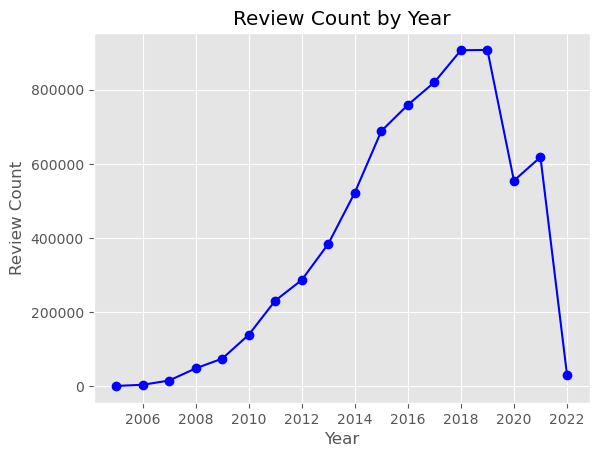

In [21]:
# Plotting
plt.plot(review_num['year'], review_num['distinct_review_count'], marker='o', color='blue')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title('Review Count by Year')
plt.xlabel('Year')
plt.ylabel('Review Count')
plt.show()

According to the line chart above, we can observe that from 2005 to 2018, the number of reviews continued to increase, reaching a peak of over 800000 reviews in 2018. The stagnation in 2019 and the overall falling trend from 2019 to 2022 demonstrate the significant negative impact that COVID-19 had on businesses.

## 2. How satisfied were customers with the businesses they have visited?

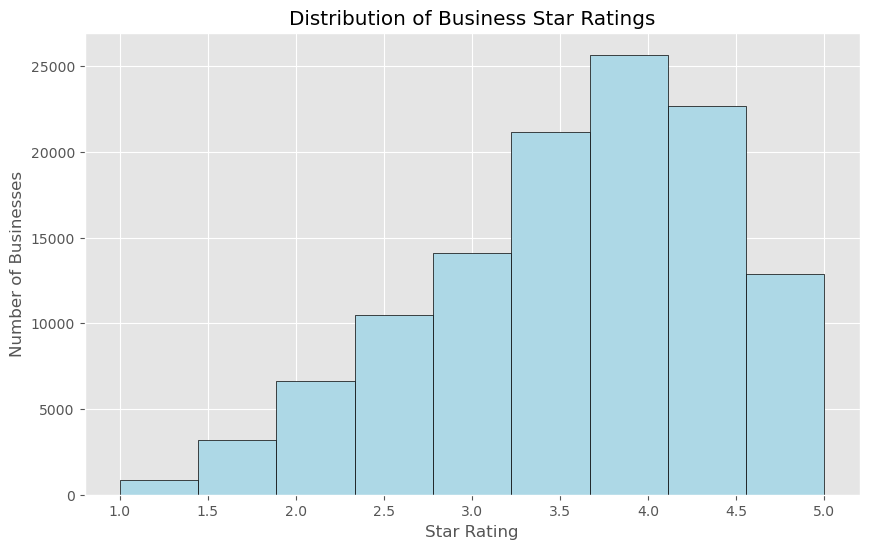

In [22]:
# Convert the stars column to Pandas for visualization
stars_pd = df_business.select('business_stars').toPandas()

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(stars_pd, bins=9, color='lightblue', edgecolor='black')
plt.title('Distribution of Business Star Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Number of Businesses')
plt.show()

The x-axis shows the star rating on a scale from 1 to 5, and the y-axis represents the number of businesses with that rating. The histogram shows a left-skewed distribution, indicating that most businesses tend to have higher star ratings. The tallest bars are located at the 4.0 and 4.5-star ratings, suggesting that the majority of businesses in this dataset are well-regarded by reviewers. There are notably fewer businesses with low star ratings (1.0 to 2.5), and a modest amount with a perfect 5.0 rating. This pattern could imply a general customer satisfaction with the services provided by these businesses or a tendency of customers to leave reviews when they have a positive experience.

## 3. How were business ratings distributed by location?

In [9]:
# Join the DataFrames on 'business_id'
df_joined = df_business.join(df_review, df_business.business_id == df_review.business_id)

# Since we will be doing aggregation, we'll drop duplicates from df_business
df_joined = df_joined.dropDuplicates(['business_id'])

In [10]:
df_joined.columns

['address',
 'attributes',
 'business_id',
 'categories',
 'city',
 'hours',
 'is_open',
 'latitude',
 'longitude',
 'business_name',
 'postal_code',
 'business_review_count',
 'business_stars',
 'state',
 'business_id',
 'review_cool',
 'review_date',
 'review_funny',
 'review_id',
 'review_stars',
 'review_text',
 'review_useful',
 'user_id']

In [11]:
spark = SparkSession.builder.appName('YelpBusinessMap').getOrCreate()

business_details = df_joined.filter(df_joined['is_open'] == 1).select(
    'latitude', 'longitude', 'business_name', 'business_stars', 'review_funny', 'review_useful', 'review_cool'
).na.drop()

# Take only the first 100 rows to prevent inefficiency
business_details = business_details.limit(100)


business_details_pd = business_details.toPandas()

map = folium.Map(location=[business_details_pd.iloc[0]['latitude'], business_details_pd.iloc[0]['longitude']], zoom_start=3)

marker_cluster = MarkerCluster().add_to(map)
for idx, row in business_details_pd.iterrows():
    popup_message = (
        f"<b>{row['business_name']}</b><br>"
        f"Stars: {row['business_stars']}<br>"
        f"Funny Votes: {row['review_funny']}<br>"
        f"Useful Votes: {row['review_useful']}<br>"
        f"Cool Votes: {row['review_cool']}"
    )
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=popup_message,
    ).add_to(marker_cluster)

map

24/04/02 12:49:16 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


## 4. What were the most popular business categories?

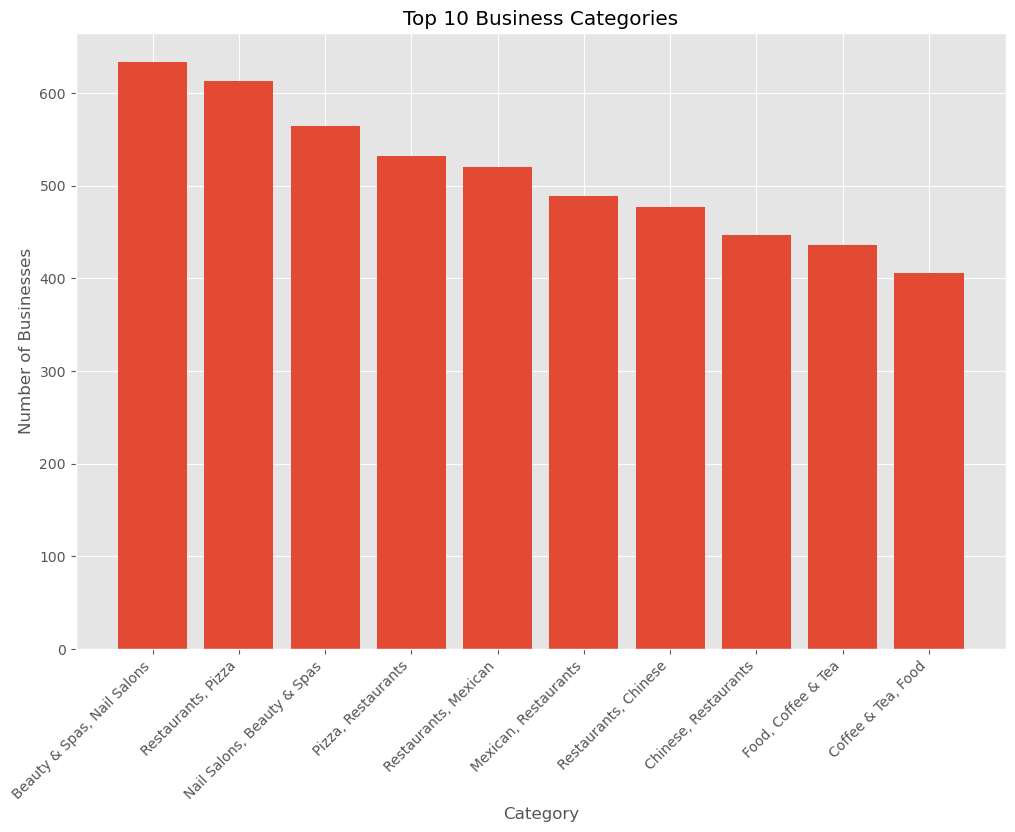

In [14]:
# Count the occurrences of each category
df_category_counts = df_business.groupBy('categories').count()

# Convert the results to Pandas DataFrame for visualization
df_category_counts_pd = df_category_counts.toPandas()

# Plot the distribution of businesses across categories
plt.figure(figsize=(12, 8))
df_category_counts_pd = df_category_counts_pd.sort_values('count', ascending=False)
plt.bar(df_category_counts_pd['categories'][:10], df_category_counts_pd['count'][:10])  # top 10 categories for simplicity
plt.xticks(rotation=45, ha="right")
plt.xlabel('Category')
plt.ylabel('Number of Businesses')
plt.title('Top 10 Business Categories')
plt.show()

Intrigued by the variance in ratings, we decided to delve into the types of businesses that would draw the most customer attention. A bar chart displaying the count of businesses per category revealed a heavy concentration in beauty & spas, restaurants, and shopping. This prompted a thought: with such high competition, especially in the food and personal care sectors, could the intensity of competition influence the ratings?

## 5. What businesses had the most useful reviews?

In [15]:
# Join df_review to df_business
df_joined = df_business.join(df_review, df_business.business_id == df_review.business_id)

# Drop duplicates
df_joined = df_joined.dropDuplicates(['business_id'])

<Figure size 1000x800 with 0 Axes>

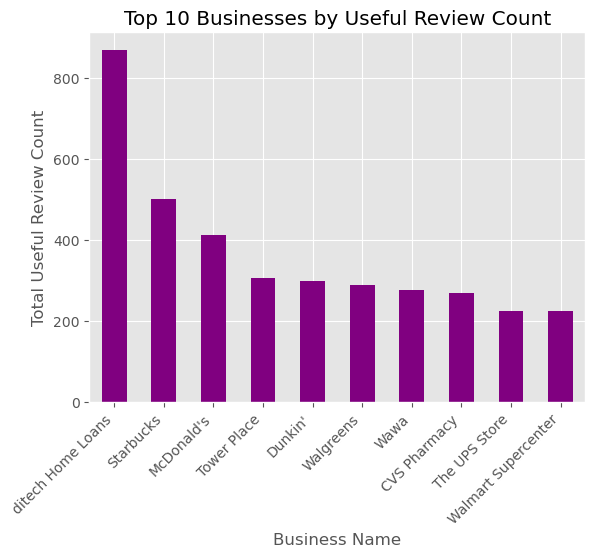

In [18]:
# Calculate useful reviews for each business
df_useful_count = df_joined.groupBy('business_name').agg(_sum('review_useful').alias('total_useful_count'))

# Extract top 10 from the previous calculations
df_top_useful = df_useful_count.orderBy('total_useful_count', ascending=False).limit(10)

# Convert the results to Pandas DataFrame for visualization
df_top_useful_pd = df_top_useful.toPandas()

# Plotting
plt.figure(figsize=(10, 8))
df_top_useful_pd.plot(kind='bar', x='business_name', y='total_useful_count', legend=None, color='purple')
plt.title('Top 10 Businesses by Useful Review Count')
plt.xlabel('Business Name')
plt.ylabel('Total Useful Review Count')
plt.xticks(rotation=45, ha="right")
plt.show();

This graph shows the number of useful reviews for the top ten businesses, with each bar representing a different business. The y-axis indicates the count of useful reviews, while the x-axis lists the business names. The business with the highest count of useful reviews appears to be ditech Home Loans. Additionally, we observe that several renowned brands, including Starbucks, McDonald's, and Dunkin', are also among the top 10.

# 8. Conclusions

# 9. References
https://github.com/soltaniehha/Big-Data-Analytics-for-Business.git

# 10. Generative AI Disclosure

In [5]:
struct_column_names = df_business.select("attributes.*").columns

In [6]:
for name in struct_column_names:
    df_business = df_business.withColumn(name, F.col("attributes").getField(name))
    df_business = df_business.withColumn(name, F.regexp_replace(F.col(name), "^u'", "'"))
    df_business = df_business.withColumn(name, F.regexp_replace(F.col(name), "^'|'$", ""))
    df_business = df_business.withColumn(name, F.when(F.col(name).isNull() | (F.col(name) == False) | (F.col(name) == None) | (F.col(name) == 'none') | (F.col(name) == 'no') | (F.col(name) == 'None'), 0)
                                   .when(F.col(name) == True, 1)
                                   .otherwise(F.col(name)))

In [7]:
df_business = df_business.drop('attributes')

In [8]:
from pyspark.sql.functions import when

df_business = df_business.withColumn('Alcohol', when(df_business['Alcohol'] == 'full_bar', 1).otherwise(when(df_business['Alcohol'] == 'beer_and_wine', 1).otherwise(0)))
df_business = df_business.withColumn('RestaurantsAttire', when(df_business['RestaurantsAttire'] == 'formal', 1).otherwise(when(df_business['RestaurantsAttire'] == 'dressy', 1).otherwise(0)))
df_business = df_business.withColumn('WiFi', when(df_business['WiFi']=='free', 1).otherwise(when(df_business['WiFi']=='paid',1).otherwise(0)))

In [14]:
from pyspark.sql import SparkSession

# Start a simple Spark Session
#spark = SparkSession.builder.appName('Select Features').getOrCreate()

# Assuming df1 is already read into a DataFrame
# df1 = spark.read....

# Selecting multiple columns to create a new DataFrame
categorical_columns = df_business.select(
    'AcceptsInsurance', 
    'BikeParking',
    'BYOBCorkage',
    'BYOB',
    'Alcohol',
    'BusinessAcceptsBitcoin',
    'BusinessAcceptsCreditCards',
    'ByAppointmentOnly',
    'Caters',
    'CoatCheck',
    'Corkage',
    'DogsAllowed',
    'DriveThru',
    'GoodForDancing', 
    'GoodForKids',
    'HappyHour', 
    'HasTV',
    'Open24Hours', 
    'OutdoorSeating',
    'RestaurantsAttire',
    'RestaurantsCounterService', 
    'RestaurantsDelivery',
    'RestaurantsGoodForGroups',
    'RestaurantsReservations', 
    'RestaurantsTableService',
    'RestaurantsTakeOut', 
    'WheelchairAccessible', 
    'WiFi'
)

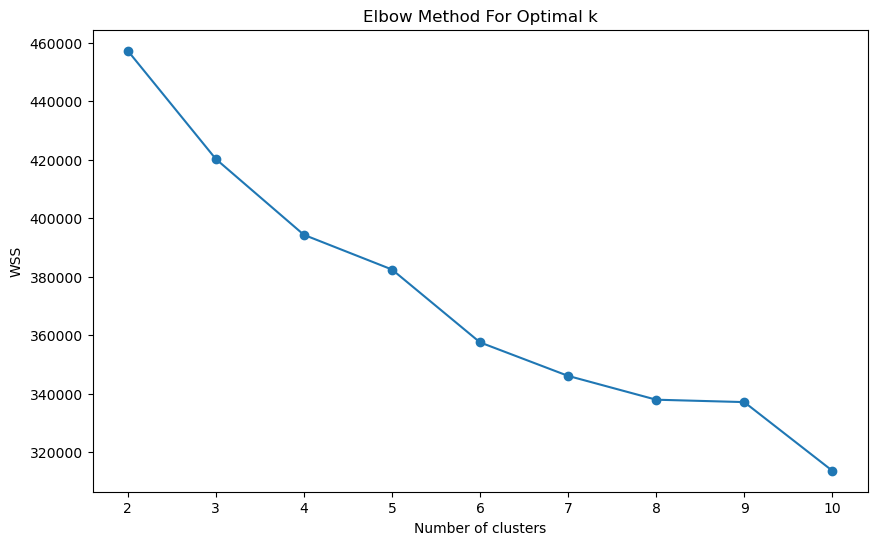

In [13]:
from pyspark.sql import SparkSession
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler, StringIndexer, OneHotEncoder
from pyspark.ml import Pipeline
import matplotlib.pyplot as plt
from pyspark.ml.evaluation import ClusteringEvaluator

# Start a Spark Session
spark = SparkSession.builder.appName('Elbow Method').getOrCreate()



indexers = [StringIndexer(inputCol=c, outputCol=c+"_index").setHandleInvalid("keep") for c in categorical_columns.columns]
encoders = [OneHotEncoder(inputCol=idx.getOutputCol(), outputCol=c+"_vec") for idx, c in zip(indexers, categorical_columns.columns)]

# Assembler to combine all feature columns
assembler_inputs = [c+"_vec" for c in categorical_columns.columns]
assembler = VectorAssembler(inputCols=assembler_inputs, outputCol="features")

# Pipeline to process and assemble features
pipeline = Pipeline(stages=indexers + encoders + [assembler])
model = pipeline.fit(df_business)
df_transformed = model.transform(df_business)

# List to store the WSS scores
wss = []

# Let's test cluster sizes from 2 to 10
for k in range(2, 11):
    kmeans = KMeans(featuresCol='features', k=k, seed=1)
    model = kmeans.fit(df_transformed.select('features'))
    predictions = model.transform(df_transformed)
    evaluator = ClusteringEvaluator()

    wss.append(model.summary.trainingCost)  # WSS for the model

# Plotting the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), wss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WSS')
plt.show()


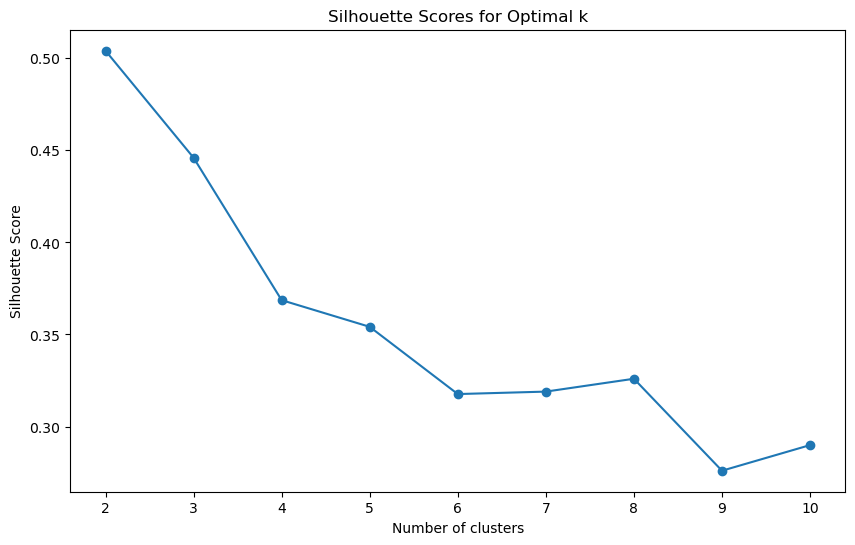

In [15]:
from pyspark.sql import SparkSession
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler, StringIndexer, OneHotEncoder
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import ClusteringEvaluator
import matplotlib.pyplot as plt

# Start a Spark Session
#spark = SparkSession.builder.appName('Silhouette Method').getOrCreate()

# Assuming 'df_business' is your DataFrame
# and 'categorical_columns' is the list of categorical column names

indexers = [StringIndexer(inputCol=column, outputCol=column+"_index").setHandleInvalid("keep") for column in categorical_columns.columns]
encoders = [OneHotEncoder(inputCol=indexer.getOutputCol(), outputCol=column+"_vec") for indexer, column in zip(indexers, categorical_columns.columns)]

# Assemble the input columns into a single vector column
assembler_inputs = [encoder.getOutputCol() for encoder in encoders]
assembler = VectorAssembler(inputCols=assembler_inputs, outputCol="features")

# Define the pipeline to process the features
pipeline = Pipeline(stages=indexers + encoders + [assembler])
pipelineModel = pipeline.fit(df_business)
df_transformed = pipelineModel.transform(df_business)

# List to store the silhouette scores
silhouette_scores = []

# Test cluster sizes from 2 to 10
for k in range(2, 11):
    kmeans = KMeans(featuresCol='features', k=k, seed=1)
    kmeansModel = kmeans.fit(df_transformed)
    predictions = kmeansModel.transform(df_transformed)
    
    # Evaluate clustering by computing Silhouette score
    evaluator = ClusteringEvaluator()
    silhouette = evaluator.evaluate(predictions)
    silhouette_scores.append(silhouette)

# Plotting the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [16]:
from pyspark.sql import SparkSession
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler, StringIndexer, OneHotEncoder
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import ClusteringEvaluator

# Start a Spark Session
#spark = SparkSession.builder.appName('Silhouette Analysis k=4').getOrCreate()


# Create a KMeans estimator for k=4
kmeans = KMeans(featuresCol='features', k=4, seed=1)

# Fit the model
kmeansModel = kmeans.fit(df_transformed)

# Make predictions
predictions = kmeansModel.transform(df_transformed)

# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()
silhouette = evaluator.evaluate(predictions)
print(f"Silhouette Score for k=4: {silhouette}")

# To display the cluster centers
centers = kmeansModel.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)


Silhouette Score for k=4: 0.36864041923952573
Cluster Centers: 
[9.98665777e-01 1.33422282e-03 5.07271514e-01 4.92728486e-01
 9.96531021e-01 3.06871247e-03 4.00266845e-04 9.85256838e-01
 1.47431621e-02 9.57171448e-01 4.28285524e-02 9.97998666e-01
 2.00133422e-03 8.03669113e-01 1.96330887e-01 9.96664443e-01
 3.33555704e-03 7.19946631e-01 2.80053369e-01 9.99799867e-01
 2.00133422e-04 9.97731821e-01 2.26817879e-03 9.37291528e-01
 6.27084723e-02 9.24883256e-01 7.51167445e-02 9.99799867e-01
 2.00133422e-04 8.53969313e-01 1.46030687e-01 9.81254169e-01
 1.87458306e-02 8.96130754e-01 1.03869246e-01 9.99733155e-01
 2.66844563e-04 7.94996664e-01 2.05003336e-01 9.97931955e-01
 2.06804536e-03 9.99933289e-01 6.67111408e-05 4.37558372e-01
 5.62441628e-01 9.62308205e-01 3.76917945e-02 9.57038025e-01
 4.29619746e-02 9.54569713e-01 4.54302869e-02 2.80186791e-02
 9.71981321e-01 7.35757171e-01 2.64242829e-01 7.05537025e-01
 2.94462975e-01]
[9.45765937e-01 5.42340628e-02 6.96330875e-01 3.03669125e-01
 9.9

In [17]:
df_business1 = df_business.toPandas()

In [19]:
import pandas as pd
convenience_features = df_business1[['AcceptsInsurance', 
                            'BikeParking',
                            'BYOBCorkage',
                            'BYOB',
                            'Alcohol',
                            'BusinessAcceptsBitcoin',
                            'BusinessAcceptsCreditCards',
                            'ByAppointmentOnly',
                            'Caters',
                            'CoatCheck',
                            'Corkage',
                            'DogsAllowed',
                            'DriveThru',
                            'GoodForDancing', 
                            'GoodForKids',
                            'HappyHour', 
                            'HasTV',
                            'Open24Hours', 
                            'OutdoorSeating',
                            'RestaurantsAttire',
                            'RestaurantsCounterService', 
                            'RestaurantsDelivery',
                            'RestaurantsGoodForGroups',
                            'RestaurantsReservations', 
                            'RestaurantsTableService',
                            'RestaurantsTakeOut', 
                            'WheelchairAccessible', 
                            'WiFi']]
# Assuming `convenience_features` has categorical data that needs to be converted.
convenience_features = pd.get_dummies(convenience_features)

/opt/conda/miniconda3/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


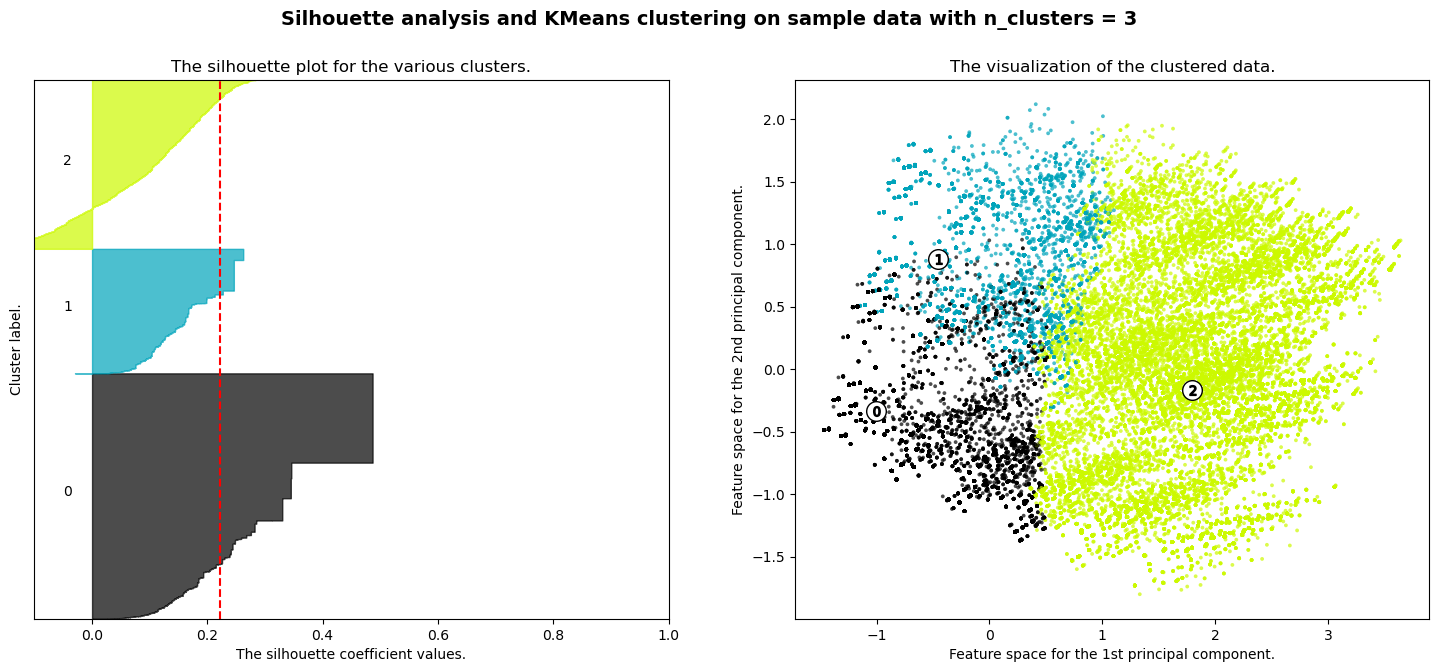

In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np



n_clusters = 3  
# Run KMeans clustering on the preprocessed data
kmeans = KMeans(n_clusters=n_clusters, random_state=10)
cluster_labels = kmeans.fit_predict(convenience_features)

# Calculate silhouette score
silhouette_avg = silhouette_score(convenience_features, cluster_labels)
sample_silhouette_values = silhouette_samples(convenience_features, cluster_labels)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

# Silhouette analysis plot (left side)
# The silhouette plot gives the silhouette scores of each sample within a cluster
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(convenience_features) + (n_clusters + 1) * 10])
y_lower = 10
for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10  # 10 for the 0 samples gap
ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values.")
ax1.set_ylabel("Cluster label.")
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([])  # Clear the y-axis labels/ticks
ax1.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

# Scatter plot (right side) using PCA for dimensionality reduction
pca = PCA(n_components=2)
convenience_features_pca = pca.fit_transform(convenience_features)
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax2.scatter(convenience_features_pca[:, 0], convenience_features_pca[:, 1], marker='.', s=30, lw=0, alpha=0.7,
            c=colors, edgecolor='k')

# Drawing the cluster centers
centers = kmeans.cluster_centers_
centers_pca = pca.transform(centers)
ax2.scatter(centers_pca[:, 0], centers_pca[:, 1], marker='o',
            c="white", alpha=1, s=200, edgecolor='k')

# Labeling the cluster centers
for i, c in enumerate(centers_pca):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st principal component.")
ax2.set_ylabel("Feature space for the 2nd principal component.")

plt.suptitle(("Silhouette analysis and KMeans clustering on sample data with n_clusters = " + str(n_clusters)),
             fontsize=14, fontweight='bold')

plt.show()


Based on the clustering of our data, we can develop a recommendation system that enhances user engagement and loyalty by personalizing their experience. For instance, if a user shows a preference for a storethen we will recommand them similar store within the cluster. By identifying the cluster that most closely matches their preferences, the system can tailor recommendations that are likely to resonate with them. These personalized recommendations would be prominently displayed on their homepage, ensuring that the suggested items or services are both relevant and appealing. This approach not only improves the overall user experience but also encourages continued engagement with the platform, fostering a sense of loyalty among users.

For n_clusters = 3, the average silhouette_score is : 0.2227450986171667


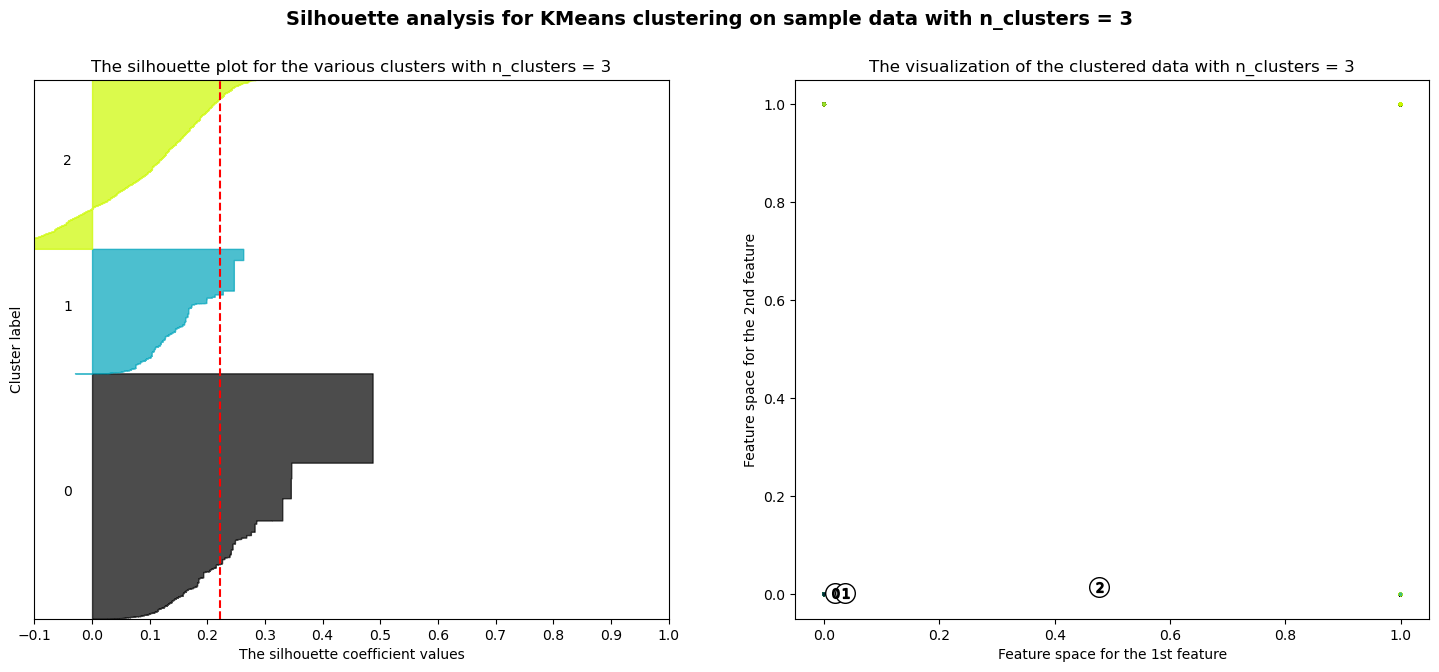

For n_clusters = 4, the average silhouette_score is : 0.22567336831141885


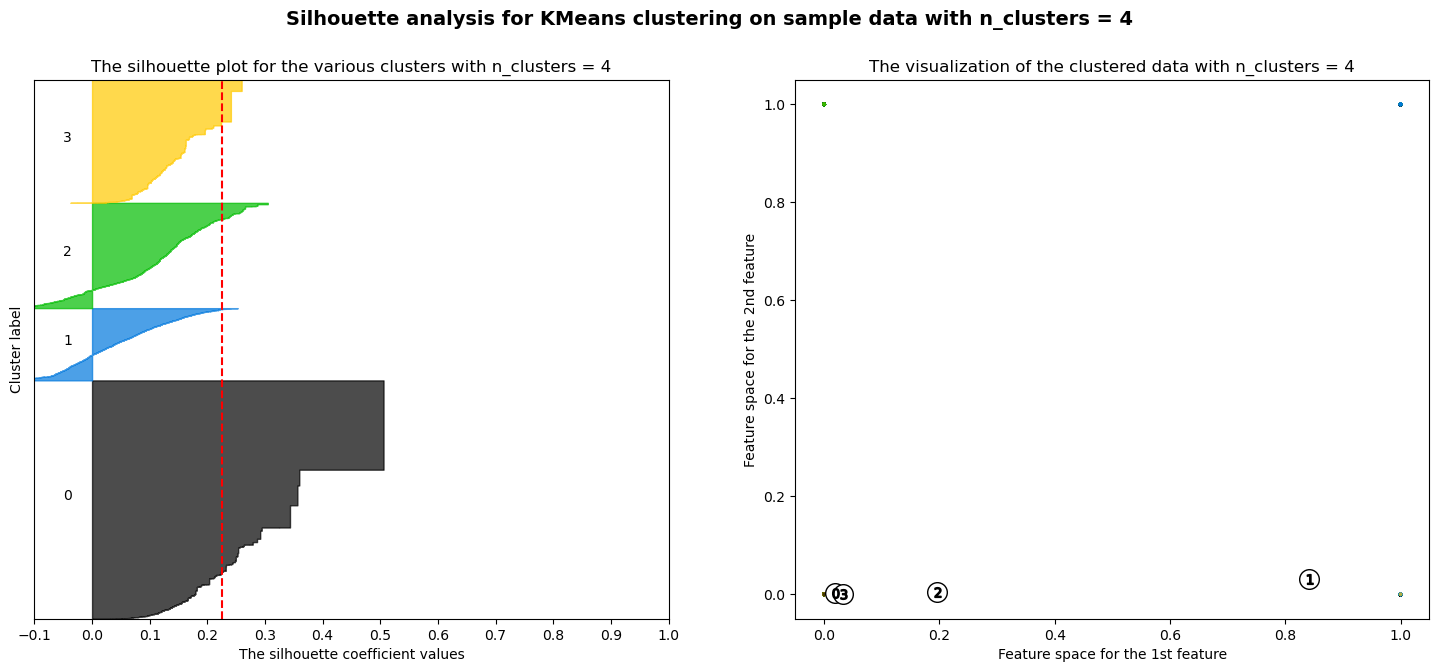

For n_clusters = 5, the average silhouette_score is : 0.22895369247554664


KeyboardInterrupt: 

In [97]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [3,4,5]

# Loop through the desired number of clusters
for n_clusters in range_n_clusters:
    # Run KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = kmeans.fit_predict(convenience_features)
    # Calculate silhouette score
    silhouette_avg = silhouette_score(convenience_features, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg}")
    # Compute silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(convenience_features, cluster_labels)
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(convenience_features) + (n_clusters + 1) * 10])
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title(f"The silhouette plot for the various clusters with n_clusters = {n_clusters}")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([i/10.0 for i in range(-1, 11)])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(convenience_features.iloc[:, 0], convenience_features.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = kmeans.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title(f"The visualization of the clustered data with n_clusters = {n_clusters}")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle((f"Silhouette analysis for KMeans clustering on sample data with n_clusters = {n_clusters}"),
                 fontsize=14, fontweight='bold')

    plt.show()


In [40]:
kmeans = KMeans(n_clusters=3, random_state=10)
cluster_labels = kmeans.fit_predict(convenience_features)

# Get the cluster centers
cluster_centers = kmeans.cluster_centers_

# You can set the threshold as the mean of each cluster's attributes
for i, center in enumerate(cluster_centers):
    print(f"Cluster {i}:")
    # Define a threshold, e.g., mean value of the cluster center
    threshold = np.mean(center)
    for feature, value in zip(convenience_features.columns, center):
        if value > threshold:  # Features that are more prevalent in the cluster
            print(f" {feature} (importance: {value:.2f})")


Cluster 0:
 AcceptsInsurance_0 (importance: 0.94)
 BikeParking_0 (importance: 1.00)
 BYOBCorkage_0 (importance: 1.00)
 BYOB_0 (importance: 1.00)
 BusinessAcceptsBitcoin_0 (importance: 1.00)
 BusinessAcceptsCreditCards_1 (importance: 0.78)
 ByAppointmentOnly_0 (importance: 0.81)
 Caters_0 (importance: 0.98)
 CoatCheck_0 (importance: 1.00)
 Corkage_0 (importance: 1.00)
 DogsAllowed_0 (importance: 0.98)
 DriveThru_0 (importance: 0.99)
 GoodForDancing_0 (importance: 1.00)
 GoodForKids_0 (importance: 0.93)
 HappyHour_0 (importance: 0.99)
 HasTV_0 (importance: 0.97)
 Open24Hours_0 (importance: 1.00)
 OutdoorSeating_0 (importance: 0.97)
 RestaurantsCounterService_0 (importance: 1.00)
 RestaurantsDelivery_0 (importance: 0.91)
 RestaurantsGoodForGroups_0 (importance: 0.98)
 RestaurantsReservations_0 (importance: 0.99)
 RestaurantsTableService_0 (importance: 0.99)
 RestaurantsTakeOut_0 (importance: 0.88)
 WheelchairAccessible_0 (importance: 0.93)
Cluster 1:
 AcceptsInsurance_0 (importance: 0.98)

Cluster 0 could named Premium Amenities Cluster.This cluster has features like 'AcceptsInsurance', 'BikeParking', and 'Corkage' with high importance (1.00), which might indicate establishments that cater to more upscale or specialized services. Features like 'BusinessAcceptsCreditCards_1' are slightly less important (0.78) but still significant. It seems to represent businesses that are more likely to offer a wider range of amenities.
cluster 1 could named Selective Convenience Cluster.'WiFi' has an importance of 0.50, indicating a moderate representation within the cluster. High importance is seen in 'BusinessAcceptsBitcoin_0', 'ByAppointmentOnly_0', and 'RestaurantsCounterService_0', suggesting a tech-friendly and modern service approach. This cluster also shows diversity in 'Caters_0' and 'Caters_1', meaning catering services might be a split feature among businesses here.
Cluster 2 could named Tech-Friendly Services Cluster.Across all clusters, features that have an importance of 1.00 can be considered the most defining characteristics of that cluster. When naming clusters, one approach is to identify the most defining features (highest importance) that differentiate one cluster from the others and use them to create a descriptive name that summarizes the cluster's essence.


In [12]:
df_business.printSchema()

root
 |-- address: string (nullable = true)
 |-- business_id: string (nullable = true)
 |-- categories: string (nullable = true)
 |-- city: string (nullable = true)
 |-- hours: struct (nullable = true)
 |    |-- Friday: string (nullable = true)
 |    |-- Monday: string (nullable = true)
 |    |-- Saturday: string (nullable = true)
 |    |-- Sunday: string (nullable = true)
 |    |-- Thursday: string (nullable = true)
 |    |-- Tuesday: string (nullable = true)
 |    |-- Wednesday: string (nullable = true)
 |-- is_open: long (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- business_name: string (nullable = true)
 |-- postal_code: string (nullable = true)
 |-- business_review_count: long (nullable = true)
 |-- business_stars: double (nullable = true)
 |-- state: string (nullable = true)
 |-- AcceptsInsurance: string (nullable = true)
 |-- AgesAllowed: string (nullable = true)
 |-- Alcohol: integer (nullable = false)
 |-- Ambience: st

In [9]:
df1 = df_business.toPandas()

In [11]:
from pyspark.sql import SparkSession

# Initialize Spark Session
spark = SparkSession.builder.appName('my_app').getOrCreate()

# Assuming df1 is your PySpark DataFrame and 'WiFi' is the column of interest
unique_wifi = df1.select('WiFi').distinct()


array(['0', 'free', 'paid'], dtype=object)

In [12]:
df1['WiFi'] = df1['WiFi'].replace({'free': '1', 'paid': '1'})

In [13]:
df1['Alcohol'].unique()
df1['Alcohol'] = df1['Alcohol'].replace({'full_bar': '1', 'beer_and_wine': '1'})

In [14]:
df1['RestaurantsAttire'].unique()
df1['RestaurantsAttire'] = df1['RestaurantsAttire'].replace({'casual': '0', 'formal': '1', 'dressy': '1'})

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
convenience_features = df1[['AcceptsInsurance', 
                            'BikeParking',
                            'BYOBCorkage',
                            'BYOB',
                            'Alcohol',
                            'BusinessAcceptsBitcoin',
                            'BusinessAcceptsCreditCards',
                            'ByAppointmentOnly',
                            'Caters',
                            'CoatCheck',
                            'Corkage',
                            'DogsAllowed',
                            'DriveThru',
                            'GoodForDancing', 
                            'GoodForKids',
                            'HappyHour', 
                            'HasTV',
                            'Open24Hours', 
                            'OutdoorSeating',
                            'RestaurantsAttire',
                            'RestaurantsCounterService', 
                            'RestaurantsDelivery',
                            'RestaurantsGoodForGroups',
                            'RestaurantsReservations', 
                            'RestaurantsTableService',
                            'RestaurantsTakeOut', 
                            'WheelchairAccessible', 
                            'WiFi']]
# Assuming `convenience_features` has categorical data that needs to be converted.
convenience_features = pd.get_dummies(convenience_features)



NameError: name 'df1' is not defined

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming df is your DataFrame after you have read the data into pandas.
# Replace this with the actual dataframe variable containing your data.
# df = pd.read_csv('your_dataset.csv')

# Calculate distortions for a range of number of clusters
inertia = []
for i in range(1, 11):  # Adjust the range of k as necessary
    kmeans = KMeans(n_clusters=i, random_state=10)
    kmeans.fit(convenience_features)
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')  # Adjust the range of k accordingly
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.tight_layout()
plt.show()


In [ ]:
range_n_clusters = list(range(2, 5)) 
silhouette_avg = []
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=10)
    cluster_labels = kmeans.fit_predict(convenience_features)    
    silhouette_avg.append(silhouette_score(convenience_features, cluster_labels))
    # Plotting the silhouette scores
plt.plot(range_n_clusters, silhouette_avg)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [21]:
# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax2.scatter(convenience_features.iloc[:, 0], convenience_features.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
            c=colors, edgecolor='k')

# Labeling the clusters
centers = kmeans.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
            c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                s=50, edgecolor='k')

# Add annotations for each data point with its cluster number
for i, (x, y) in enumerate(convenience_features.iloc[:, :2].values):
    ax2.text(x, y, str(cluster_labels[i]), color=colors[i], fontweight='bold')


AttributeError: 'KMeans' object has no attribute 'cluster_centers_'

In [22]:
import matplotlib.patheffects as path_effects
for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker='o', c="white", alpha=1, s=200, edgecolor='k')
    # Annotate the cluster number in black with a white edge
    ax2.annotate(str(i), (c[0], c[1]), color='black', weight='bold', 
             fontsize=12, ha='center', va='center', zorder=2,
             path_effects=[path_effects.withStroke(linewidth=3, foreground="white")])

In [24]:
# Assuming `kmeans` is your fitted KMeans model and `convenience_features` is your data
centroids = kmeans.cluster_centers_
features = convenience_features.columns

for i, centroid in enumerate(centroids):
    print(f"Cluster {i} centroid values:")
    for feature, value in zip(features, centroid):
        print(f"{feature}: {value:.2f}")
    print()


AttributeError: 'KMeans' object has no attribute 'cluster_centers_'

Based on the count plots in the uploaded image, here are the insights one might infer for each cluster:

1. **Cluster 0**:
   - A majority of businesses accept credit cards and provide bike parking.
   - A smaller proportion of businesses have a drive-thru feature.

2. **Cluster 1**:
   - This cluster has a considerable number of businesses that accept credit cards but significantly fewer that offer bike parking.
   - Drive-thru feature is more prominent in this cluster compared to Cluster 0.

3. **Cluster 2**:
   - Few businesses in this cluster accept credit cards or provide bike parking.
   - Very few businesses offer a drive-thru feature.

4. **Cluster 3**:
   - This cluster is not as prominent in any of the features as compared to the others, suggesting it might consist of businesses that are less customer-convenience focused or could represent a niche market segment.

Overall, these plots suggest that clusters can be characterized by the availability of features that reflect customer convenience. Clusters 0 and 1 appear to be more convenience-oriented, with most businesses in these clusters accepting credit cards and differing mainly in the availability of bike parking and drive-thrus. Clusters 2 and 3, particularly Cluster 3, may represent businesses that are less traditional in their operations, such as newer ventures, specialty services, or locations where these convenience features are less common. 
